# In this notebook, we're going to cover some of the most fundamental concepts of tensors using TensorFlow

More specifically, we're going to cover:
* Introduction to tensors
* Getting information from tensors
* Manipulating tensors
* Tensors & NumPy
* Using @tf.function (a way to speed up your regular Python functions)
* Using GPUs with TensorFlow (or TPUs)
* Exercises to try for yourself!

See full course materials on GitHub: https://github.com/mrdbourke/tensorflow-deep-learning/

## Introduction to Tensors

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
# create a tensor with tf.constant()
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [3]:
# Check the number of dimensions of a tensor (ndim stands for number of dimensions)
scalar.ndim

0

In [4]:
# create a vector
vector = tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10])>

In [5]:
import numpy as np
np.array([10,10]).shape

(2,)

In [6]:
# check the dimension of vector
vector.ndim

1

In [7]:
# Create a matrix (has more than 1 dimension)
matrix = tf.constant([[10,7],
                      [7,10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]])>

In [8]:
matrix.ndim

2

In [9]:
# create another matrix
another_matrix = tf.constant([[10., 7.],
                              [3., 2.],
                              [8., 9.]], dtype=tf.float16)# specify the data type with dtype parameter
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [10]:
# What's the number dimensions of another_matrix?
another_matrix.ndim

2

* Scalar has 0 dimension
* Vector has 1 dimension
* Matrix has 2 dimension
* Tensor has 3 dimension

In [11]:
# Let's create a tensor
tensor = tf.constant([ [[1, 2, 3],
                        [4, 5, 6]],
                      
                       [[7, 8, 9,],
                        [10, 11, 12]],
                       
                       [[13, 14, 15],
                        [16, 17, 18]]
                     ])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]])>

In [12]:
tensor.ndim

3

In [13]:
# Let's create a tensor
t_tensor = tf.constant([ [[1, 2, 3],
                        [4, 5, 6]],
                      
                       [[7, 8, 9,],
                        [10, 11, 12]],
                       
                       [[13, 14, 15],
                        [16, 17, 18]],
                        
                       [[13, 14, 15],
                        [16, 17, 18]]
                     ])
t_tensor

<tf.Tensor: shape=(4, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]],

       [[13, 14, 15],
        [16, 17, 18]]])>

What we've created so far:

* Scalar: a single number
* Vector: a number with direction (e.g. wind speed and direction)
* Matrix: a 2-dimensional array of numbers
* Tensor: an n-dimensional array of numbers (when n can be any number, a 0-dimensional tensor is a scalar, a 1-dimensional tensor is a vector)

### Creating tensors with `tf.Variable`

In [14]:
tf.Variable

tensorflow.python.ops.variables.Variable

In [15]:
# Create the same tesnor with tf.Variable() as above
changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 7])

changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7])>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7])>)

In [16]:
# Let's try change one of the elements in our changeable tensor
changeable_tensor[0]

<tf.Tensor: shape=(), dtype=int32, numpy=10>

In [17]:
# now change
changeable_tensor[0] = 7
changeable_tensor

TypeError: 'ResourceVariable' object does not support item assignment

In [18]:
# How about we try .assign()
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7])>

In [19]:
# Let's try change our unchangable tensor
unchangeable_tensor[0] = 7
unchangeable_tensor

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

In [20]:
# How about we try .assign()
unchangeable_tensor[0].assign(7)

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'assign'

🔑 **Note:** Rarely in practice will you need to decide whether to use `tf.constant` or `tf.Variable` to create tensors, as TensorFlow does this for you. However, if in doubt, use `tf.constant` and change it later if needed.

### Creating random tensors

Random tensors are tensors of some abitrary size which contain random numbers.

In [21]:
# Create two random (but the same) tensors
random_1 = tf.random.Generator.from_seed(42) # set seed for reproducibility
random_1 = random_1.normal(shape=(3,2))

random_1

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193763, -1.8107855 ]], dtype=float32)>

In [22]:
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3,2))

random_2

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.7565803 , -0.06854702],
       [ 0.07595026, -1.2573844 ],
       [-0.23193763, -1.8107855 ]], dtype=float32)>

In [23]:
# Are they equal ?
random_1, random_2, random_1 == random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193763, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

### Shuffle the order of elements in a tensor

In [24]:
# Shuffle a tesnor (valuable for when you want to shuffle your data so the inherent order doesn't effect learning)
not_shuffled = tf.constant([[10, 7],
                            [3, 4],
                            [2, 5]])

# Shuffle our non-shuffled tensor
tf.random.shuffle(value = not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [ 2,  5],
       [10,  7]])>

In [25]:
not_shuffled

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]])>

In [26]:
# Shuffle our non-shuffled tensor
tf.random.shuffle(not_shuffled, seed=42), tf.random.shuffle(not_shuffled, seed=42)

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 2,  5],
        [ 3,  4],
        [10,  7]])>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 2,  5],
        [ 3,  4],
        [10,  7]])>)

In [27]:
# case 4:
# even after setting the random_seed inside the method result are not same
# For that use both global and in method seed same

tf.random.set_seed(42)
tf.random.shuffle(not_shuffled, seed=42)

# No matter hoe many time we re-run this our result remains same

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]])>

🛠 **Exercise:** Read through TensorFlow documentation on random seed generation: https://www.tensorflow.org/api_docs/python/tf/random/set_seed and practice writing 5 random tensors and shuffle them.

It looks like if we want our shuffled tensors to be in the same order, we've got to use the global level random seed as well as the operation level random seed:

> Rule 4: "If both the global and the operation seed are set: Both seeds are used in conjunction to determine the random sequence."

In [28]:
r1 = tf.constant([[1, 2],
                  [2, 1],
                  [8, 9]])

r2 = tf.constant([[10, 7],
                  [7, 10],
                  [15, 18]])

In [29]:
# case 1: neither Globle nor operation level
tf.random.shuffle(r1), tf.random.shuffle(r2)

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[2, 1],
        [8, 9],
        [1, 2]])>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[15, 18],
        [10,  7],
        [ 7, 10]])>)

In [30]:
# case 2: global seed is set, but the operation seed is not

#  we get different results for every call to the random op, but the same sequence 
# for every re-run of the program:

tf.random.set_seed(57)

tf.random.shuffle(r1)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[1, 2],
       [8, 9],
       [2, 1]])>

In [31]:
# case 3: global seed is not set, but the operation seed is set
tf.random.shuffle(r1)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[2, 1],
       [1, 2],
       [8, 9]])>

In [32]:
# case 5: if both seed is different
tf.random.set_seed(57)

tf.random.shuffle(r1, seed=42), tf.random.shuffle(r1, seed=42)

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [2, 1],
        [8, 9]])>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[2, 1],
        [1, 2],
        [8, 9]])>)

In [33]:
tf.random.set_seed(42) # global level random seed
tf.random.shuffle(not_shuffled, seed=42) # operation level random seed

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]])>

### Other ways to make tensors

In [34]:
# Create a tensor of all ones
tf.ones(shape=[10,7])

<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [35]:
# create atensor of all zeros
tf.zeros(shape=[5,5])

<tf.Tensor: shape=(5, 5), dtype=float32, numpy=
array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]], dtype=float32)>

In [36]:
# to change the dtype
tf.zeros(shape=(5,5), dtype = tf.int32)

<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])>

### Turn NumPy arrays into tensors

The main difference between NumPy arrays and TensorFlow tensors is that tensors can be run on a GPU (much faster for numerical computing).

In [37]:
# You can also turn NumPy arrays into tensors
numpy_A = np.arange(1, 25, dtype=np.int32)
numpy_A

# X = tf.constant(some_matrix) # capital for matrix or tensor
# y = tf.constant(vector) # non-capital for vector

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [38]:
# lets convert
A = tf.constant(numpy_A)
A

<tf.Tensor: shape=(24,), dtype=int32, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])>

In [39]:
# lets chage the dimension 3D
A = tf.constant(numpy_A, shape=(2,3,4)) # 2*3*4 = 24
B = tf.constant(numpy_A)
A, '\n', B

(<tf.Tensor: shape=(2, 3, 4), dtype=int32, numpy=
 array([[[ 1,  2,  3,  4],
         [ 5,  6,  7,  8],
         [ 9, 10, 11, 12]],
 
        [[13, 14, 15, 16],
         [17, 18, 19, 20],
         [21, 22, 23, 24]]])>,
 '\n',
 <tf.Tensor: shape=(24,), dtype=int32, numpy=
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24])>)

In [40]:
A.ndim

3

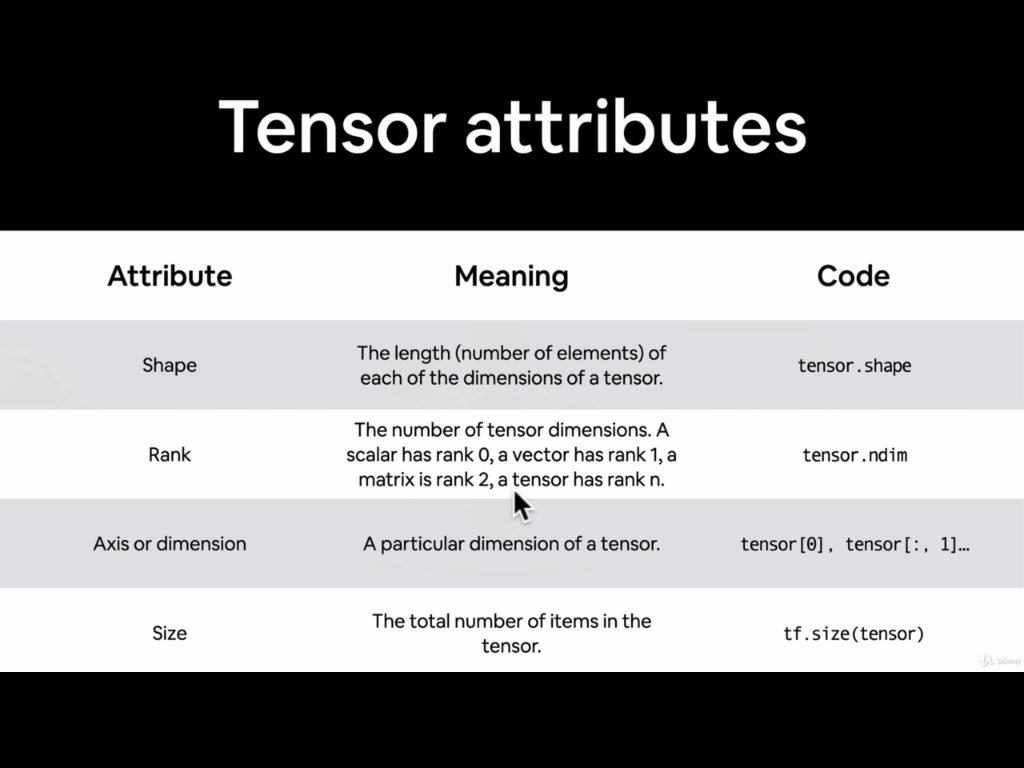

### Getting information from tensors

When dealing with tensors you probably want to be aware of the following attributes:
* Shape
* Rank
* Axis or dimension
* Size

In [41]:
# Create a rank 4 tensor (4 dimensions)
rank_4_tensor = tf.zeros(shape=(2,3,4,5) )

In [42]:
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [43]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [44]:
2 * 3 * 4 * 5

120

In [45]:
# Get various attributes of our tensor
print("Datatype of every element:", rank_4_tensor.dtype)
print("Number of dimensions (rank):", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along the 0 axis:", rank_4_tensor.shape[0])
print("Elements along the last axis:", rank_4_tensor.shape[-1])
print("Total number of elements in our tensor:", tf.size(rank_4_tensor))
print("Total number of elements in our tensor:", tf.size(rank_4_tensor).numpy())

Datatype of every element: <dtype: 'float32'>
Number of dimensions (rank): 4
Shape of tensor: (2, 3, 4, 5)
Elements along the 0 axis: 2
Elements along the last axis: 5
Total number of elements in our tensor: tf.Tensor(120, shape=(), dtype=int32)
Total number of elements in our tensor: 120


In [46]:
 rank_4_tensor[0].shape

TensorShape([3, 4, 5])

### Indexing tensors

Tensors can be indexed just like Python lists.

In [47]:
some_list = [1, 2, 3, 4]
some_list[:2]

[1, 2]

In [48]:
# get the first 2 elements of each dimension
rank_4_tensor[:2, :2, :2, :2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [49]:
 some_list[:1]

[1]

In [50]:
rank_4_tensor.shape

TensorShape([2, 3, 4, 5])

In [51]:
# Get the first element from each dimension from each index except for the final one
rank_4_tensor[:1, :1, :1], rank_4_tensor[:1, :1, :1].numpy()

(<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>,
 array([[[[0., 0., 0., 0., 0.]]]], dtype=float32))

In [52]:
rank_4_tensor[:1, :1, :, :1]

<tf.Tensor: shape=(1, 1, 4, 1), dtype=float32, numpy=
array([[[[0.],
         [0.],
         [0.],
         [0.]]]], dtype=float32)>

#### Adding an extra dimension

In [53]:
# Create a rank 2 tensor (2 dimensions)
rank_2_tensor = tf.constant([[10, 7],
                             [3, 4]])

rank_2_tensor.shape, rank_2_tensor.ndim, tf.size(rank_2_tensor)

(TensorShape([2, 2]), 2, <tf.Tensor: shape=(), dtype=int32, numpy=4>)

In [54]:
rank_2_tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]])>

In [55]:
some_list, some_list[-1]

([1, 2, 3, 4], 4)

In [56]:
# Get the last item of each of row of our rank 2 tensor
rank_2_tensor[:, -1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 4])>

In [57]:
# Add an extra dimesion to our rank 2 tensor
rank_3_tensor = rank_2_tensor[..., tf.newaxis]

In [58]:
rank_3_tensor

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]])>

In [59]:
test = rank_2_tensor[tf.newaxis, ...]
test

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [ 3,  4]]])>

In [60]:
# Alternative to tf.newaxis
tf.expand_dims(rank_2_tensor, axis=-1) # "-1" means expand the final(last) axis

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]])>

In [61]:
tf.expand_dims(rank_2_tensor, axis=0) # expand the 0th axis

<tf.Tensor: shape=(1, 2, 2), dtype=int32, numpy=
array([[[10,  7],
        [ 3,  4]]])>

In [62]:
tf.expand_dims(rank_2_tensor, axis=1) # expand dimension in the middle

<tf.Tensor: shape=(2, 1, 2), dtype=int32, numpy=
array([[[10,  7]],

       [[ 3,  4]]])>

### Manipulating tensors (tensor operations)

**Basic operations**

`+`, `-`, `*`, `/`

In [63]:
# You can add values to a tensor using the addition operator
tensor = tf.constant([[10, 7],
                      [3, 4]])

tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]])>

In [64]:
# original tensor is unchnaged
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]])>

In [65]:
# Multiplication also works
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]])>

In [66]:
# Substraction if you want
tensor - 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]])>

In [67]:
# We can use the tensorflow built-in function too
tf.multiply(x = tensor, y=10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]])>

In [68]:
# still original tensor is unchanged
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]])>

In [69]:
tf.add(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]])>

**Matrix multiplication**

In machine learning, matrix multiplication is one of the most common tensor operations.

There are two rules our tensors (or matrices) need to fulfil if we're going to matrix multiply them: 

1. The inner dimensions must match
2. The resulting matrix has the shape of the outer dimensions

In [70]:
# Matrix multiplication in tensorflow
print(tensor)

tf.matmul(tensor, tensor)

tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]])>

In [71]:
tensor, tensor

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4]])>,
 <tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4]])>)

In [72]:
# Element-wise 
tensor * tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  49],
       [  9,  16]])>

In [73]:
# Matrix mutliplication with Python operator "@" (not element wise)
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]])>

In [74]:
tensor.shape

TensorShape([2, 2])

In [75]:
# Create a (3,2) tensor
X = tf.constant([[1,2],
                 [3,4],
                 [5,6]])

# Create another (3,2) tensor
Y = tf.constant([[7, 8],
                 [9 ,10],
                 [11, 12]])
X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]])>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]])>)

In [76]:
# Try to matrix multiply tensors of same shape
X @ Y

InvalidArgumentError: Matrix size-incompatible: In[0]: [3,2], In[1]: [3,2] [Op:MatMul]

In [ ]:
# tf.transpose(Y).shape

In [77]:
Y

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 7,  8],
       [ 9, 10],
       [11, 12]])>

In [78]:
# Let's change the shape of Y
tf.reshape(Y, shape=(2, 3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7,  8,  9],
       [10, 11, 12]])>

In [79]:
X.shape, tf.reshape(Y, shape=(2,3)).shape

(TensorShape([3, 2]), TensorShape([2, 3]))

In [80]:
# Try to matrix multiply X by reshaped Y
X @ tf.reshape(Y, shape=(2,3))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]])>

In [81]:
tf.matmul(X, tf.reshape(Y, shape=(2, 3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]])>

In [82]:
tf.reshape(X, shape=(2, 3)).shape, Y.shape

(TensorShape([2, 3]), TensorShape([3, 2]))

In [83]:
# Try change the shape of X instead of Y
tf.matmul(tf.reshape(X, shape=(2, 3)), Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 58,  64],
       [139, 154]])>

In [84]:
# Can do the same with transpose
X, tf.transpose(X), tf.reshape(X, shape=(2, 3))

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]])>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 3, 5],
        [2, 4, 6]])>,
 <tf.Tensor: shape=(2, 3), dtype=int32, numpy=
 array([[1, 2, 3],
        [4, 5, 6]])>)

In [85]:
# Try matrix multiplication with transpose rather than reshape
tf.matmul(tf.transpose(X), Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]])>

🛠 **Note :** 
- Transpose -> Flip the axis
- Reshape -> shuffle the elements corresponding to given shape

📖 **Resource:** Info and example of matrix multiplication: https://www.mathsisfun.com/algebra/matrix-multiplying.html

 **The dot product**

Matrix multiplication is also referrred to as the dot product.

You can perform matrix multiplication using:
* `tf.matmul()`
* `tf.tensordot()`
* `@`

In [86]:
X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]])>,
 <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]])>)

In [87]:
# Perform the dot product on X and Y (requires X or Y to be transposed)
tf.tensordot(tf.transpose(X), Y, axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]])>

In [88]:
# Perform matrix mutliplication between X and Y (transposed)
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]])>

In [89]:
# Perform matrix multiplication between X and Y (reshaped)
tf.matmul(X, tf.reshape(Y, shape=(2, 3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]])>

In [90]:
# Check the values of Y, reshape Y and transposed Y
print("Normal Y:")
print(Y, "\n") # "\n" is for newline

print("Y reshaped to (2, 3):")
print(tf.reshape(Y, (2, 3)), "\n")

print("Y transposed:")
print(tf.transpose(Y))

Normal Y:
tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) 

Y reshaped to (2, 3):
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32) 

Y transposed:
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32)


In [91]:
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]])>

Generally, when performing matrix multiplication on two tensors and one of the axes doesn't line up, you will tranpose (rather than reshape) one of the tensors to get satisify the matrix multiplication rules.

### Changing the datatype of a tensor 

In [92]:
# Create a new tensor with default datatype (float32)
B = tf.constant([1.7, 7.4])
B.dtype

tf.float32

In [93]:
C = tf.constant([7, 10])
C.dtype

tf.int32

In [94]:
# Change from float32 to float16 (reduced precision)
B = tf.cast(B, dtype=tf.float16)
B

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>

In [95]:
# Change from int32 to float32
E = tf.cast(C, dtype=tf.float32)
E

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([ 7., 10.], dtype=float32)>

In [96]:
E_float16 = tf.cast(E, dtype=tf.float16)
E_float16

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([ 7., 10.], dtype=float16)>

### Aggregating tensors

Aggregating tensors = condensing them from multiple values down to a smaller amount of values.

In [97]:
# Get the absolute values
D = tf.constant([-7, -10])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10])>

In [98]:
# Get the absolute values
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10])>

Let's go through the following forms of aggregation:
* Get the minimum
* Get the maximum
* Get the mean of a tensor
* Get the sum of a tensor

In [99]:
# Create a random tensor with values between 0 and 100 of size 50
E = tf.constant(np.random.randint(1,100, size=50))
E

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([48, 51, 37, 91, 79,  5, 41, 84, 36,  7, 51, 99, 60, 91, 22,  2, 28,
       10, 66, 31, 71, 89, 33, 31, 20, 89, 26, 32, 59, 83, 76, 57, 61, 63,
       41, 66,  5, 55,  5, 51, 57, 34, 84,  9,  4, 98, 19, 20, 10, 49])>

In [100]:
tf.size(E), E.shape, E.ndim

(<tf.Tensor: shape=(), dtype=int32, numpy=50>, TensorShape([50]), 1)

In [101]:
# Find the minimum
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [102]:
# Find the maximum
tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=int32, numpy=99>

In [103]:
# Find the mean
tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=int32, numpy=46>

In [104]:
 # Find the sum
tf.reduce_sum(E)

<tf.Tensor: shape=(), dtype=int32, numpy=2336>

🛠 **Exercise:** With what we've just learned, find the variance and standard deviation of our `E` tensor using TensorFlow methods.

In [105]:
# math.reduce_variane() -> required input to be in real(float) or complex format
tf.math.reduce_variance(tf.cast(E, dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=819.8416>

In [106]:
# math.reduce_std() -> required input to be in real(float) or complex format
tf.math.reduce_std(tf.cast(E,dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=28.632877>

To list of compatible version of tensorflow_probability w.r.t TensorFlow
https://stackoverflow.com/questions/63456427/this-version-of-tensorflow-probability-requires-tensorflow-version-2-3

In [107]:
# !pip install tensorflow_probability==0.11.1

In [108]:
# To find the variance of our tensor, we need access to tensorflow_probability
import tensorflow_probability as tfp

tfp.stats.variance(E) # tensorflow_probability's variance() -> doesn't require Float value

<tf.Tensor: shape=(), dtype=int32, numpy=820>

In [109]:
# Find the standard deviation
tf.math.reduce_std(tf.cast(E, dtype=tf.float32))

<tf.Tensor: shape=(), dtype=float32, numpy=28.632877>

### Find the positional maximum and minimum



In [110]:
# Create a new tensor for finding positional minimum and maxmimum

tf.random.set_seed(42)

F = tf.random.uniform(shape=[50])
F

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
       0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
       0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
       0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
       0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
       0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
       0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
       0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
       0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
       0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
      dtype=float32)>

In [111]:
# Find the Positional Maxmium
tf.argmax(F) #return maximum index of max ele.

<tf.Tensor: shape=(), dtype=int64, numpy=42>

In [112]:
# Index of our larget value position
F[tf.argmax(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [113]:
# Find the max value of F
tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=float32, numpy=0.9671384>

In [114]:
# Check for equality
assert F[tf.argmax(F)] == tf.reduce_max(F) #give error if not equal

In [115]:
F[tf.argmax(F)] == tf.reduce_max(F)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [116]:
# Find the positional minimum
tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=16>

In [117]:
# Find the minimum using the positional minimum index
F[tf.argmin(F)]

<tf.Tensor: shape=(), dtype=float32, numpy=0.009463668>

### Squeezing a tensor (removing all single dimensions)

In [118]:
# create atensor to get started
tf.random.set_seed(42)
G = tf.constant(tf.random.uniform(shape=[50]), shape = (1, 1, 1, 1, 50))
G

<tf.Tensor: shape=(1, 1, 1, 1, 50), dtype=float32, numpy=
array([[[[[0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
           0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
           0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
           0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
           0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
           0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
           0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
           0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
           0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
           0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043]]]]],
      dtype=float32)>

In [119]:
G.shape

TensorShape([1, 1, 1, 1, 50])

In [120]:
# tf.squeeze(G) Removes dimensions of size 1 from the shape of a tensor.
G_squeezed = tf.squeeze(G)

G_squeezed, G_squeezed.shape

(<tf.Tensor: shape=(50,), dtype=float32, numpy=
 array([0.6645621 , 0.44100678, 0.3528825 , 0.46448255, 0.03366041,
        0.68467236, 0.74011743, 0.8724445 , 0.22632635, 0.22319686,
        0.3103881 , 0.7223358 , 0.13318717, 0.5480639 , 0.5746088 ,
        0.8996835 , 0.00946367, 0.5212307 , 0.6345445 , 0.1993283 ,
        0.72942245, 0.54583454, 0.10756552, 0.6767061 , 0.6602763 ,
        0.33695042, 0.60141766, 0.21062577, 0.8527372 , 0.44062173,
        0.9485276 , 0.23752594, 0.81179297, 0.5263394 , 0.494308  ,
        0.21612847, 0.8457197 , 0.8718841 , 0.3083862 , 0.6868038 ,
        0.23764038, 0.7817228 , 0.9671384 , 0.06870162, 0.79873943,
        0.66028714, 0.5871513 , 0.16461694, 0.7381023 , 0.32054043],
       dtype=float32)>,
 TensorShape([50]))

### One-hot encoding tensors

In [121]:
# Create a list of indices
some_list = [0, 1, 2, 3] # could be red, green, blue, purple

# One hot encode our list of indices
tf.one_hot(some_list, depth=4) # Depth -> number of columns

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

In [122]:
tf.one_hot(some_list, depth=3)

<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]], dtype=float32)>

In [123]:
# Specify custom values for one hot encoding
tf.one_hot(some_list, depth=4, on_value="yo I love deep learning", off_value="I also like to dance")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'yo I love deep learning', b'I also like to dance',
        b'I also like to dance', b'I also like to dance'],
       [b'I also like to dance', b'yo I love deep learning',
        b'I also like to dance', b'I also like to dance'],
       [b'I also like to dance', b'I also like to dance',
        b'yo I love deep learning', b'I also like to dance'],
       [b'I also like to dance', b'I also like to dance',
        b'I also like to dance', b'yo I love deep learning']],
      dtype=object)>

In [124]:
tf.one_hot(some_list, depth=4, on_value='Okay', off_value="Not!!")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'Okay', b'Not!!', b'Not!!', b'Not!!'],
       [b'Not!!', b'Okay', b'Not!!', b'Not!!'],
       [b'Not!!', b'Not!!', b'Okay', b'Not!!'],
       [b'Not!!', b'Not!!', b'Not!!', b'Okay']], dtype=object)>

### Squaring, log, square root

In [125]:
# create a new tensor
H = tf.range(1,10)
H

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [126]:
# Square it
tf.square(H)

<tf.Tensor: shape=(9,), dtype=int32, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])>

In [127]:
# Find the squareroot (will error, method requires non-int type)
tf.sqrt(H)

InvalidArgumentError: Value for attr 'T' of int32 is not in the list of allowed values: bfloat16, half, float, double, complex64, complex128
	; NodeDef: {{node Sqrt}}; Op<name=Sqrt; signature=x:T -> y:T; attr=T:type,allowed=[DT_BFLOAT16, DT_HALF, DT_FLOAT, DT_DOUBLE, DT_COMPLEX64, DT_COMPLEX128]> [Op:Sqrt]

In [ ]:
# Find the suare root
tf.sqrt(tf.cast(H, dtype=tf.float32))

In [128]:
# Find the log
tf.math.log(tf.cast(H, dtype=tf.float32))

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

### Tensors and NumPy

TensorFlow interacts beautifully with NumPy arrays.

🔑 **Note:** One of the main differences between a TensorFlow tensor and a NumPy array is that a TensorFlow tensor can be run on a GPU or TPU (for faster numerical processing).

In [129]:
# Create a tensor directly from a NumPy array
J = tf.constant(np.array([3., 7., 10.]))
J

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [130]:
# Convert our tensor back to a NumPy array
np.array(J), type(np.array(J))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [131]:
# Convert tensor J to a NumPy array
J.numpy(), type(J.numpy())

(array([ 3.,  7., 10.]), numpy.ndarray)

In [132]:
# The default types of each are slightly different
numpy_J = tf.constant(np.array([3., 7., 10.]))
tensor_J = tf.constant([3., 7., 10.])
# Check the datatypes of each
numpy_J.dtype, tensor_J.dtype

(tf.float64, tf.float32)

### Finding access to GPUs 

In [133]:
import tensorflow as tf
tf.config.list_physical_devices("GPU")

[]

> 🔑 **Note:** If you have access to a CUDA-enabled GPU, TensorFlow will automatically use it whenver possible.

In [134]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]